# Nepal earthquake 2015 Severity Index

## Naufal Ahmed MH

### 26, March 2021

In [55]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from wordcloud import WordCloud, STOPWORDS 
import missingno

In [56]:
import numpy as np

In [57]:
os.chdir(r'D:\2020-22.M.Sc_IIRS-ISRO\2021.March 1-2 April_Module-6\2021_Project_3d modelling\Nepal_Shapefile')
%matplotlib inline

In [58]:
#Open shapefile
district = gpd.read_file('nepal_severityIndex.shp')
type(district)

geopandas.geodataframe.GeoDataFrame

In [59]:
print(district.shape)

(75, 16)


In [60]:
#to view CRS of object
print(district.crs)

epsg:4326


In [61]:
district.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [62]:
print(district.head(10))

   DISTRICT     area    Density  FID_1 DISTRICT_1 DISTRICT_2       REGION  \
0     HUMLA  6053.57    8.40132      0      Humla      Humla  Mid-Western   
1  DARCHULA  2361.00   56.44810      1   Darchula   Darchula  Far-Western   
2   BAJHANG  3507.65   55.63810      2    Bajhang    Bajhang  Far-Western   
3      MUGU  3235.05   17.08970      3       Mugu       Mugu  Mid-Western   
4    BAJURA  2294.14   58.80720      4     Bajura     Bajura  Far-Western   
5   BAITADI  1500.59  167.20000      5    Baitadi    Baitadi  Far-Western   
6     DOLPA  7941.11    4.62152      6      Dolpa      Dolpa  Mid-Western   
7     JUMLA  2563.98   42.48120      7      Jumla      Jumla  Mid-Western   
8   KALIKOT  1647.94   83.10250      8    Kailali    Kailali  Far-Western   
9      DOTI  2058.86  102.84600      9       Doti       Doti  Far-Western   

   Hazard  Exposure  Vulnerabil  Field8  Field9  Severity  Severity_N  \
0     0.0      0.02        5.00   10.00    7.50      0.02        0.05   
1     

In [63]:
from geopandas import GeoDataFrame

DISTRICT       0
area           0
Density        0
FID_1          0
DISTRICT_1     0
DISTRICT_2     0
REGION         0
Hazard         0
Exposure       0
Vulnerabil     0
Field8         0
Field9         0
Severity       0
Severity_N     0
Severity_c    27
geometry       0
dtype: int64

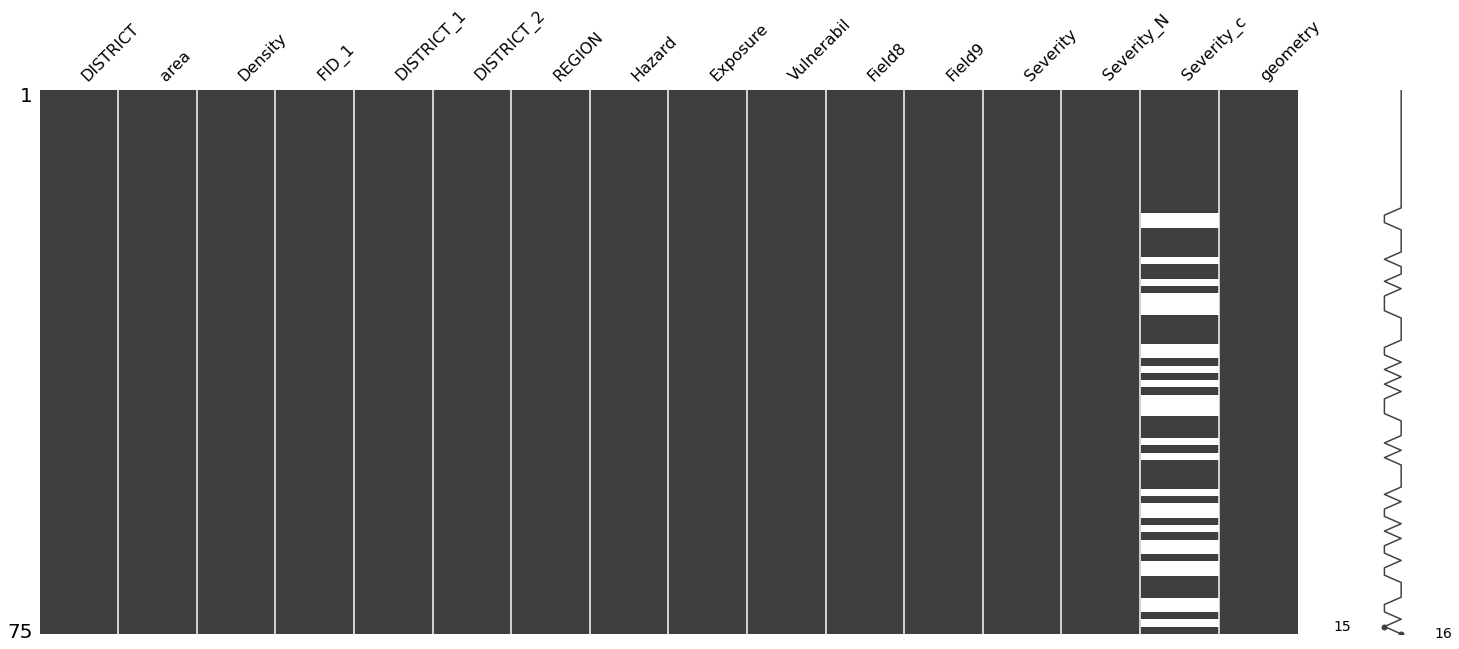

In [64]:
#to check the data quality
missingno.matrix(district)
district.isnull().sum()

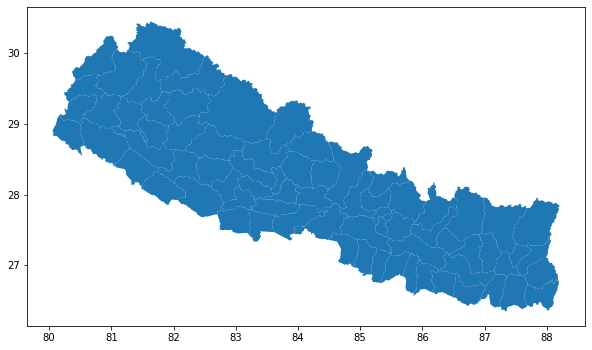

In [65]:
fig, ax1 = plt.subplots(figsize=(10, 10))

district.plot(ax=ax1)

plt.show()

D:\Applications\Anaconda_Python\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


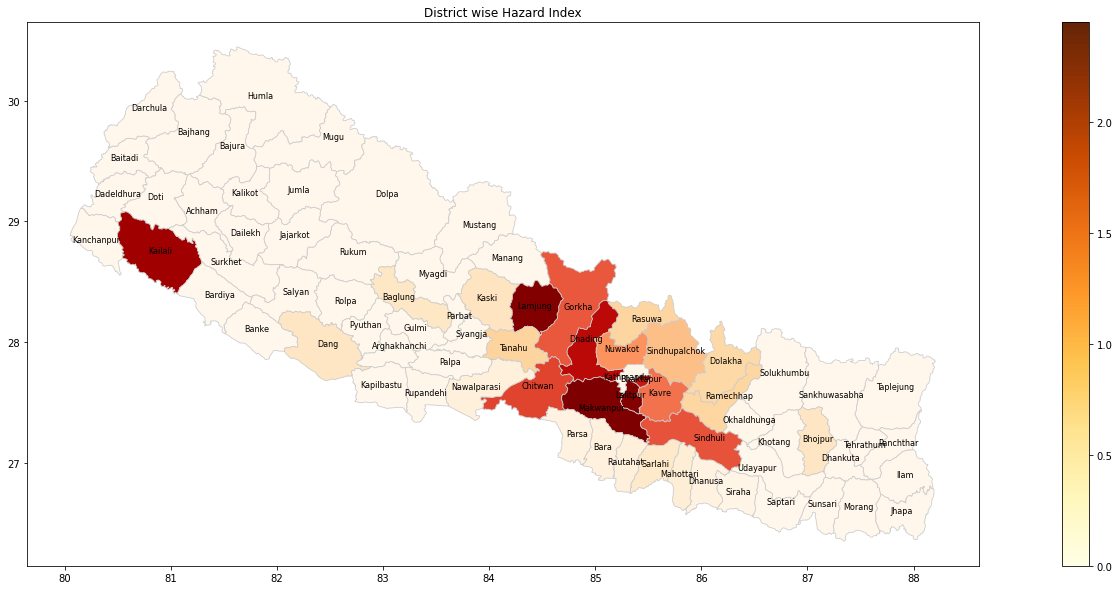

In [66]:
#District wise Hazard Index

#for sorting based on the Hazard Value. 
district1 = district[['DISTRICT', 'Hazard', 'geometry']]
district1['Hazard'] = district['Hazard'].astype(int)
district1 = district.sort_values(by=['Hazard']).reset_index()
district1= gpd.GeoDataFrame(district)

#for plotting the graph
variable = 'Hazard'
vmin, vmax = 0, 2.45
fig, ax = plt.subplots(1, figsize=(30, 10))
sm = plt.cm.ScalarMappable(cmap='YlOrBr', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm)

district1.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# To add title
ax.set_title('District wise Hazard Index')

# To add labels
district['coords'] = district1['geometry'].apply(lambda x: x.representative_point().coords[:])
district['coords'] = [coords[0] for coords in district1['coords']]


for i in range(len(district1['DISTRICT'])):
    plt.annotate(text=(district1['DISTRICT'][i]).capitalize(), 
xy=district1['coords'][i],horizontalalignment='center', fontsize = 8)

plt.show()

D:\Applications\Anaconda_Python\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


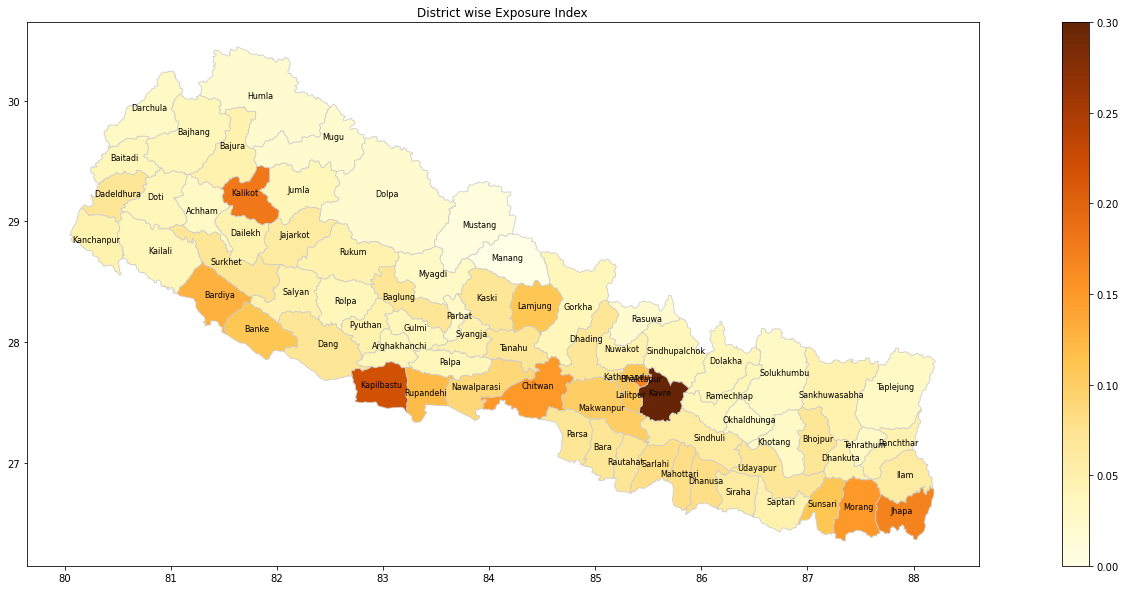

In [67]:
#District wise Exposure Index

#for sorting based on the Hazard Value. 
district1 = district[['DISTRICT', 'Exposure', 'geometry']]
district1['Exposure'] = district['Exposure'].astype(int)
district1 = district.sort_values(by=['Exposure']).reset_index()
district1= gpd.GeoDataFrame(district)

#for plotting the graph
variable = 'Exposure'
vmin, vmax = 0, 0.3
fig, ax = plt.subplots(1, figsize=(30, 10))
sm = plt.cm.ScalarMappable(cmap='YlOrBr', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm)

district1.plot(column=variable, cmap='YlOrBr', linewidth=0.8, ax=ax, edgecolor='0.8')

# To add title
ax.set_title('District wise Exposure Index')

# To add labels
district['coords'] = district1['geometry'].apply(lambda x: x.representative_point().coords[:])
district['coords'] = [coords[0] for coords in district1['coords']]


for i in range(len(district1['DISTRICT'])):
    plt.annotate(text=(district1['DISTRICT'][i]).capitalize(), 
xy=district1['coords'][i],horizontalalignment='center', fontsize = 8)

plt.show()

D:\Applications\Anaconda_Python\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


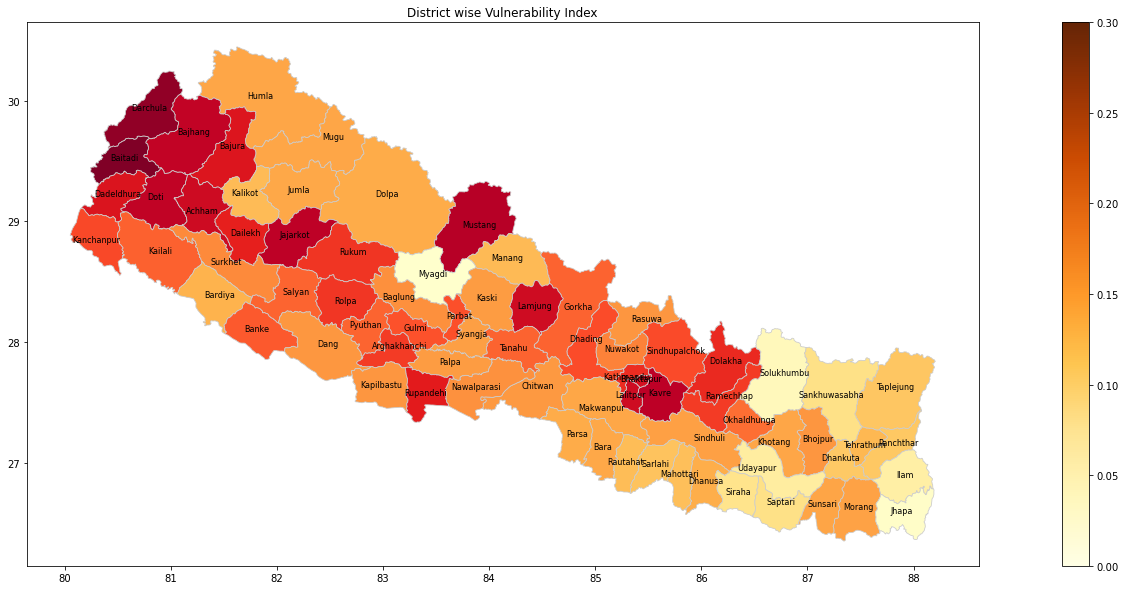

In [68]:
#District wise Vulnerability Index

#for sorting based on the Hazard Value. 
district1 = district[['DISTRICT', 'Vulnerabil', 'geometry']]
district1['Vulnerability'] = district['Vulnerabil'].astype(int)
district1 = district.sort_values(by=['Vulnerabil']).reset_index()
district1= gpd.GeoDataFrame(district)

#for plotting the graph
variable = 'Vulnerabil'
vmin, vmax = 0, 0.3
fig, ax = plt.subplots(1, figsize=(30, 10))
sm = plt.cm.ScalarMappable(cmap='YlOrBr', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm)

district1.plot(column=variable, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# To add title
ax.set_title('District wise Vulnerability Index')

# To add labels
district['coords'] = district1['geometry'].apply(lambda x: x.representative_point().coords[:])
district['coords'] = [coords[0] for coords in district1['coords']]


for i in range(len(district1['DISTRICT'])):
    plt.annotate(text=(district1['DISTRICT'][i]).capitalize(), 
xy=district1['coords'][i],horizontalalignment='center', fontsize = 8)

plt.show()

D:\Applications\Anaconda_Python\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


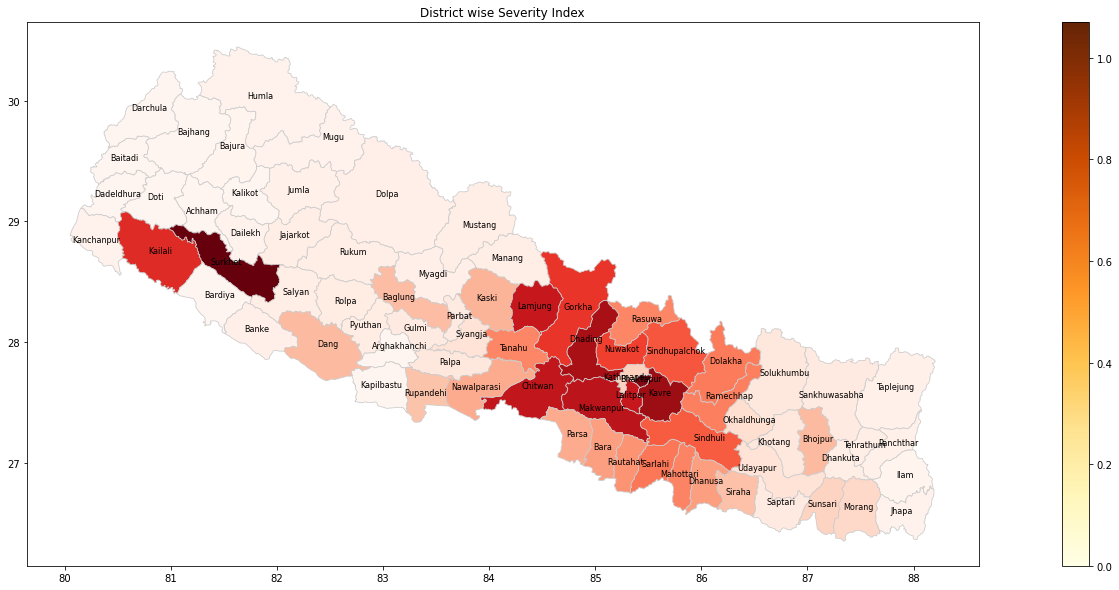

In [71]:
#District wise Severity Index

#for sorting based on the Severity Value. 
district1 = district[['DISTRICT', 'Severity', 'geometry']]
district1['Vulnerability'] = district['Severity'].astype(int)
district1 = district.sort_values(by=['Severity']).reset_index()
district1= gpd.GeoDataFrame(district)

#for plotting the graph
variable = 'Severity'
vmin, vmax = 0, 1.07
fig, ax = plt.subplots(1, figsize=(30, 10))
sm = plt.cm.ScalarMappable(cmap='YlOrBr', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm)

district1.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

# To add title
ax.set_title('District wise Severity Index')

# To add labels
district['coords'] = district1['geometry'].apply(lambda x: x.representative_point().coords[:])
district['coords'] = [coords[0] for coords in district1['coords']]


for i in range(len(district1['DISTRICT'])):
    plt.annotate(text=(district1['DISTRICT'][i]).capitalize(), 
xy=district1['coords'][i],horizontalalignment='center', fontsize = 8)

plt.show()